## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
metadata_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
metadata_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
metadata_complete.count()
#no lines missing

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
metadata_complete.groupby(["Mouse ID"]).count()

# There are 249 individual mice IDs

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [4]:
# Any Mouse ID's with duplicate Timepoints need to delete all data related to that mouse ID
metadata_complete.groupby(["Mouse ID", "Timepoint"])
metadata_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# checking the format of metadata_complete
metadata_complete.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = metadata_complete.loc[metadata_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice2 = metadata_complete.loc[metadata_complete['Mouse ID'] =='g989']
duplicate_mice2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# use duplicate_mice which returns array(['g989'], dtype=object)

metadata_complete = metadata_complete[metadata_complete["Mouse ID"].isin(duplicate_mice)==False]
metadata_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame. Yes - 248 mice now
metadata_complete.groupby(["Mouse ID"]).count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [10]:
# How many drugs are we looking at?
metadata_complete["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [11]:
# Generate a PYPLOT summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drugs_mean = metadata_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drugs_median = metadata_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drugs_variance = metadata_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drugs_std = metadata_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drugs_sem = metadata_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

In [12]:
summary_df = pd.DataFrame({"Mean":drugs_mean,
                                   "Median":drugs_median,
                                   "Variance":drugs_variance,
                                   "Standard Deviation":drugs_std,
                                   "SEM":drugs_sem     
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a PANDAS summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line of code

Agg_df = metadata_complete.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

Agg_df




Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for 
# each drug regimen using PANDAS.

drugby_timept = metadata_complete.groupby(["Drug Regimen"]).count()["Timepoint"]

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

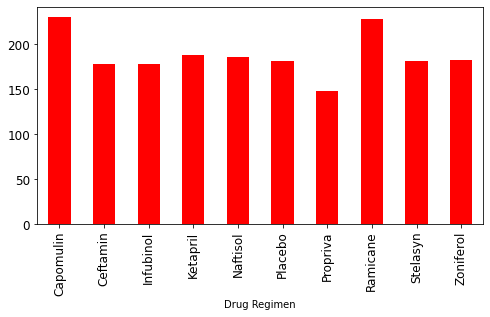

In [15]:
plot_pandas = drugby_timept.plot.bar(figsize = (8, 4), color = "r", fontsize = 12)

drugby_timept

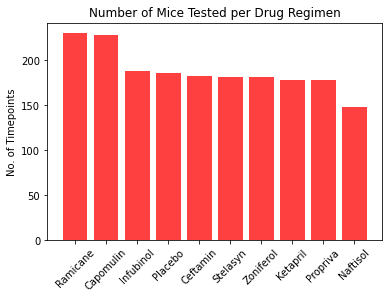

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = metadata_complete["Drug Regimen"].unique()
plt.title("Number of Mice Tested per Drug Regimen")
plt.ylabel("No. of Timepoints")
plt.bar(x_axis, metadata_complete["Drug Regimen"].value_counts(), facecolor="red", alpha=0.75, align="center")
plt.xticks(rotation=45)
plt.show()


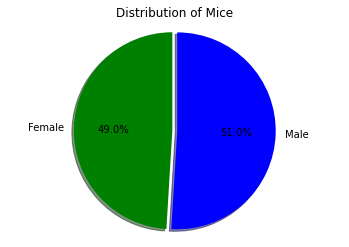

In [17]:
# Generate a pie plot showing the distribution of female versus male mice 
# Pandas

drugs_bysex = metadata_complete["Sex"].value_counts()
drugs_bysex

gender = ["Female","Male"]
mice = [922, 958]
colors = ["green", "blue"]
explode = (0, 0.05)

plt.title("Distribution of Mice")
plt.pie(mice, explode=explode, labels = gender, colors = colors, autopct = "%1.1f%%",shadow = True, startangle=90)
plt.axis("equal")
plt.show()






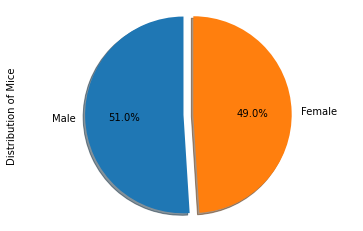

In [18]:
# Generate a pie plot showing the distribution of female versus male mice
# .pyplot

labels = 'Male', 'Female'
sizes = [51, 49]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
plt.ylabel("Distribution of Mice")
ax1.axis('equal')  
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


mice_max= metadata_complete.groupby(["Drug Regimen","Mouse ID"]).max()['Timepoint']

tumor_max = pd.merge(mice_max, metadata_complete, on = ["Mouse ID", "Timepoint"], how = "left")
tumor_max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Table shows each mouse listed once


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
243,q633,45,Zoniferol,Male,12,25,70.827796,2
244,s337,45,Zoniferol,Male,14,27,62.109651,4
245,w140,5,Zoniferol,Female,19,30,47.717952,0
246,w575,45,Zoniferol,Female,16,28,68.401286,3


In [20]:
# array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
#        'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'



In [21]:
# Put treatments into a list for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
             
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol = []

for treatment in Regimen:

    volume = tumor_max.loc[tumor_max["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    tumor_vol.append(volume)
        
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

#     print(f"The lower quartile of {treatment} is: {lowerq}")
#     print(f"The upper quartile of {treatment} is: {upperq}")
#     print(f"The interquartile range of {treatment} is: {iqr}")
#     print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")
    print(f"{treatment} {lower_bound} {upper_bound}")
                
   

Capomulin 20.70456164999999 51.83201549
Ramicane 17.912664470000003 54.30681135
Infubinol 36.83290494999999 82.74144559000001
Ceftamin 25.355449580000002 87.66645829999999


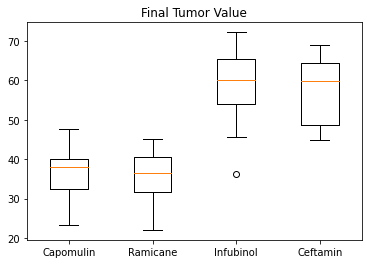

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Value')
ax1.set_ylabel('')
ax1.boxplot(tumor_vol, labels = Regimen)
plt.show()




## Line and Scatter Plots

In [23]:
metadata_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

## create Capomulin 'only' df
## is_capomulin is a boolean variable with True or False argument 

is_capomulin = metadata_complete["Drug Regimen"] == "Capomulin"

capomulin_df = metadata_complete[is_capomulin]

mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"]== "s185"]

mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


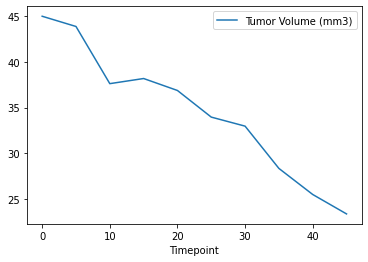

In [25]:
# CONTINUED: Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## using mouse s185
line_plot = mouse_df.plot.line(x="Timepoint", y="Tumor Volume (mm3)")
                                     
                                        

In [26]:
# Dataframe of Capomulin only.
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


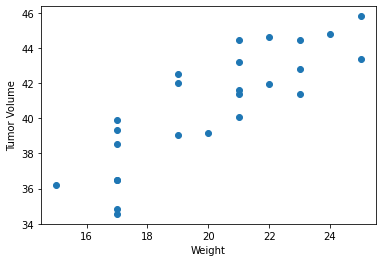

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df

capomulin_avg = capomulin_df.groupby(["Mouse ID"]).mean()

capomulin_avg

x_values = capomulin_avg["Weight (g)"]

y_values = capomulin_avg["Tumor Volume (mm3)"]


plt.scatter(x_values,y_values)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

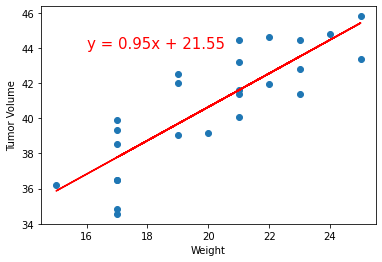

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regime

x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()

In [ ]:
## though the chart is interesting, it's only showing that weight increases 
 #as the tumor size increases. This may or may not have anything to do with Capomulin.